In [1]:
import json
import pandas as pd
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt
sns.set_theme()

In [8]:
from experiments.experiment_config import (
    ALL_LIGHTNING_MODELS,
    DRIVE_AND_ACT_VIEWPOINTS,
    # get_drive_and_act_loaders,
    # two_actors_samples,
    # four_actors_samples,
    # driver_and_act_pretrained_map,
)
result = {}
subset_percentage = [1, 5, 10, 25, 50, 100]
metric_name = ['avg_mpjpe', 'avg_activity_macro_mpjpe', 'avg_p_mpjpe', 'avg_p_activity_macro_mpjpe'][0]
for view_point in DRIVE_AND_ACT_VIEWPOINTS:
    raw_training_results = []
    transfer_learning_results = []
    for model in ALL_LIGHTNING_MODELS:
        model_name = model.__name__
        simple_model_name = model_name.replace('Lit', '')
        print(f'{model_name=}, {view_point=}')
        raw_training_path = Path(f'saved_lifter_2d_3d_model/rq2/{model_name}/drive_and_act/{view_point}/single_actor')
        transfer_learning_path = Path(f'saved_lifter_2d_3d_model/rq2/{model_name}/transfer_learning/{view_point}/single_actor')
        raw_training_result = {}
        for subset in subset_percentage:
            with (raw_training_path / f'subset_{subset}' / 'summary.json').open() as f:
                data = json.loads(f.read())
                raw_training_result[subset] = {
                    # avg_mpjpe=data['avg_mpjpe'],
                    # avg_activity_macro_mpjpe=data['avg_activity_macro_mpjpe'],
                    # avg_p_mpjpe=data['avg_p_mpjpe'],
                    # avg_p_activity_macro_mpjpe=data['avg_p_activity_macro_mpjpe']
                    f'raw: {simple_model_name}': data[metric_name]
                }

        transfer_learning_result = {}
        for subset in subset_percentage:
            with (transfer_learning_path / f'subset_{subset}' / 'summary.json').open() as f:
                data = json.loads(f.read())
                transfer_learning_result[subset] = {
                    # avg_mpjpe=data['avg_mpjpe'],
                    # avg_activity_macro_mpjpe=data['avg_activity_macro_mpjpe'],
                    # avg_p_mpjpe=data['avg_p_mpjpe'],
                    # avg_p_activity_macro_mpjpe=data['avg_p_activity_macro_mpjpe']
                    f'finetuned: {simple_model_name}': data[metric_name]
                }
        raw_training_result_df = pd.DataFrame(raw_training_result)
        transfer_learning_result_df = pd.DataFrame(transfer_learning_result)
        raw_training_results.append(raw_training_result_df)
        transfer_learning_results.append(transfer_learning_result_df)
    result[view_point] = dict(
        raw_training=raw_training_results,
        transfer_learning=transfer_learning_results
    )
# fig, ax = plt.subplots()
# ax.plot(raw_training_result_df.loc['avg_mpjpe'])
# # ax.plot(transfer_learning_result_df.loc['avg_mpjpe'])
# # ax.plot(raw_training_result_df.loc['avg_p_mpjpe'] - transfer_learning_result_df.loc['avg_p_mpjpe'])
# ax.set(xticks=raw_training_result_df.loc['avg_mpjpe'].index);

model_name='LitSemGCN', view_point='a_column_co_driver'
model_name='LitGraphMLP', view_point='a_column_co_driver'
model_name='LitGraformer', view_point='a_column_co_driver'
model_name='LitJointFormer', view_point='a_column_co_driver'
model_name='LitSemGCN', view_point='a_column_driver'
model_name='LitGraphMLP', view_point='a_column_driver'
model_name='LitGraformer', view_point='a_column_driver'
model_name='LitJointFormer', view_point='a_column_driver'
model_name='LitSemGCN', view_point='inner_mirror'
model_name='LitGraphMLP', view_point='inner_mirror'
model_name='LitGraformer', view_point='inner_mirror'
model_name='LitJointFormer', view_point='inner_mirror'


In [9]:
raw_training_series = pd.concat(result['a_column_co_driver']['raw_training'])
transfer_learning_series = pd.concat(result['a_column_co_driver']['transfer_learning'])

In [10]:
raw_training_series

,1,5,10,25,50,100
raw: SemGCN,88.852941,80.639282,80.921338,75.608084,75.134278,70.027455
raw: GraphMLP,81.864454,83.032031,73.598717,68.737853,64.898160,63.948713
raw: Graformer,80.710271,75.518455,71.961384,69.546680,67.554184,65.550931
raw: JointFormer,107.225311,90.100134,84.111970,73.338544,67.267418,63.063016


In [32]:
raw_training_series[subset_percentage].values

array([[ 88.85294106,  80.63928224,  80.92133794,  75.60808398,
         75.13427828,  70.02745476],
       [ 81.86445385,  83.03203061,  73.59871734,  68.73785332,
         64.89816029,  63.94871324],
       [ 80.71027137,  75.51845536,  71.96138427,  69.54667997,
         67.55418424,  65.5509308 ],
       [107.22531099,  90.10013379,  84.11196992,  73.338544  ,
         67.26741837,  63.06301616]])

KeyError: "None of [Index([1, 5, 10, 25, 50, 100], dtype='int64')] are in the [columns]"

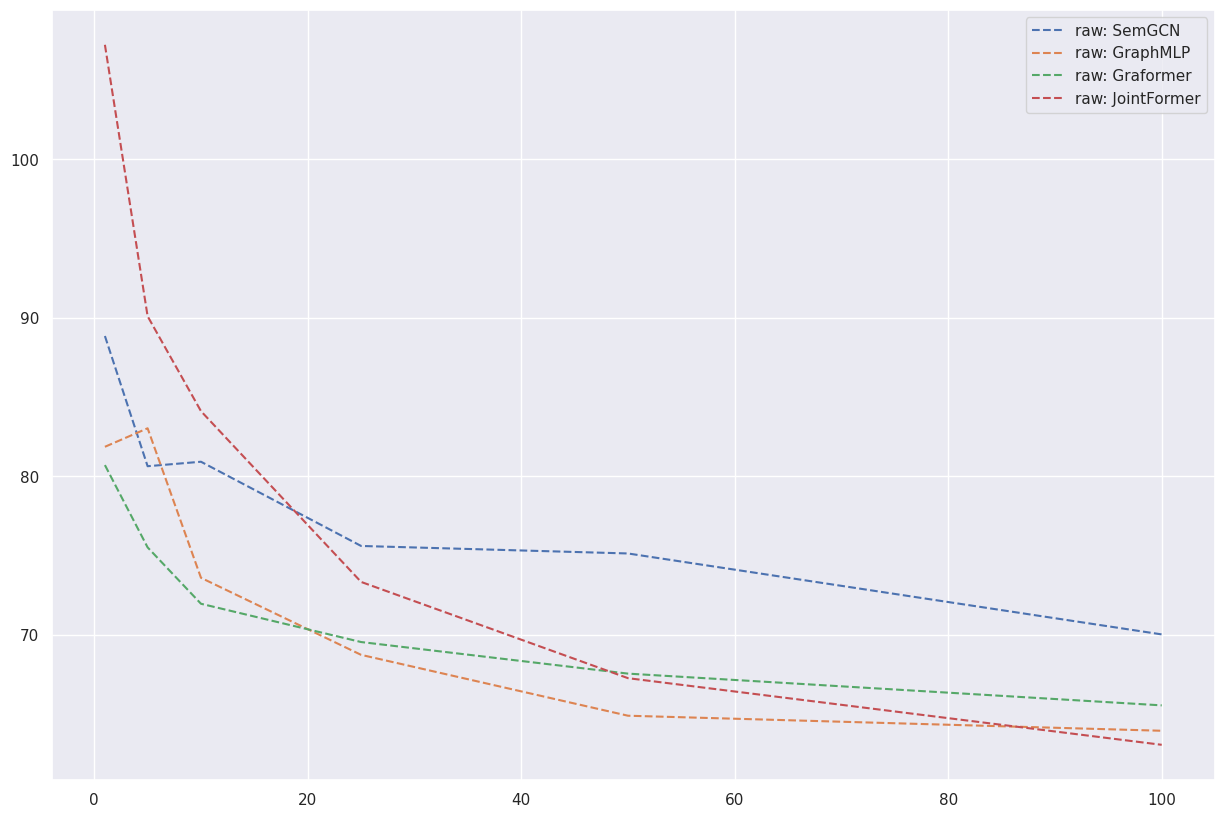

In [34]:
# plt.plot(
#     raw_training_series[subset_percentage[1:]].T
# )
fig, ax = plt.subplots(figsize=(15, 10))
# ax.plot(raw_training_series[subset_percentage[1:]].T)
# ax.plot(transfer_learning_result_df.loc['avg_mpjpe'])
# ax.plot(raw_training_result_df.loc['avg_p_mpjpe'] - transfer_learning_result_df.loc['avg_p_mpjpe'])
# ax.set(xticks=raw_training_series[subset_percentage[1:]].T.index);

raw_training_series[subset_percentage].T.plot(
    ax=ax,
    color=sns.color_palette()[:len(subset_percentage)],
    linestyle='dashed'
)
raw_training_series[subset_percentage].T.plot(
    ax=ax,
    x=raw_training_series[subset_percentage].columns.values, y = raw_training_series[subset_percentage].values,
    kind='scatter',
    color=sns.color_palette()[:len(subset_percentage)],
    # linestyle='dashed'
)
transfer_learning_series[subset_percentage].T.plot(
    ax=ax,
    color=sns.color_palette()[:len(subset_percentage)]
)

In [ ]:
raw_training_series[subset_percentage[1:]].T

In [24]:
sns.color_palette()[::2]

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.8, 0.7254901960784313, 0.4549019607843137)]